In [36]:
%config Completer.use_jedi = False
from IPython.display import display, clear_output
import numpy as np
import pandas as pd

import tensorflow as tf
import mystic.symbolic as ms

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

<img src='gates.png'/>

In [3]:
XA    = np.array([0.,1.,0.,1.])
XB    = np.array([0.,0.,1.,1.])
X     = np.array([[0.,1.,0.,1.], [0.,0.,1.,1.] ])

_NOT  = lambda xa : np.logical_not(xa).astype(float)

_AND  = lambda xa, xb: np.logical_and(xa,xb).astype(float)
_NAND = lambda xa, xb: np.logical_not( np.logical_and(xa,xb)).astype(float)

_OR   = lambda xa, xb: np.logical_or(xa,xb).astype(float)
_NOR  = lambda xa, xb: np.logical_not(np.logical_or(xa,xb)).astype(float)

_XOR  = lambda xa, xb: np.logical_xor(xa,xb).astype(float)
_XNOR = lambda xa, xb: np.logical_not(np.logical_xor(xa,xb)).astype(float)


In [83]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def single_gate(x, y):
    model = tf.keras.Sequential()
    model.add( tf.keras.layers.Dense(1, activation="sigmoid"))    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])    
    model.fit( x.T,  y, epochs = 3000, verbose = 0)   
    
    w  = model.layers[0].get_weights()[0]
    b  = model.layers[0].get_weights()[1]
    return w, b

def double_gate(x, y):
    model = tf.keras.Sequential()
    model.add( tf.keras.layers.Dense(2, activation="sigmoid")) 
    model.add( tf.keras.layers.Dense(1, activation="sigmoid"))    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])    
    model.fit( x.T,  y, epochs = 3000, verbose = 0)   
    
    w1  = model.layers[0].get_weights()[0]
    b1  = model.layers[0].get_weights()[1]
    w2  = model.layers[1].get_weights()[0]
    b2  = model.layers[1].get_weights()[1]
    
    return w1, b1,w2,b2



## AND 

$ \sigma ( Xa.wa + Xb.wb + b)  = Y_{and}$ $\Rightarrow$
$
\begin{cases}
 b &< 0.5 \\
 wb + b &< 0.5 \\
 wa + b &< 0.5 \\
 wa +  wb + b &\geq 0.5 \\
\end{cases}
$

In [66]:
wa  = np.linspace( -5, 5, 50 )
wb  = np.linspace( -5, 5, 50 )
xyz = []    

bb = -1        
for waa in wa:
    if waa + bb <0.5:
        for wbb in wb:
            if wbb + bb <0.5:
                if waa +  wbb + bb >= 0.5:
                    xyz.append([[waa],[ wbb], [bb]])


xyz = np.asarray(xyz)
xyz = xyz.reshape(xyz.shape[0] ,xyz.shape[1])

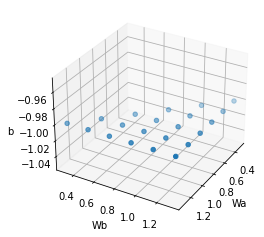

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 30)
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2])
ax.set_xlabel('Wa')
ax.set_ylabel('Wb')
ax.set_zlabel('b');

In [68]:
 w_and, b_and = single_gate(X, _AND(XA,XB) )

In [69]:
print(w_and, b_and )

[[1.1817076]
 [1.944764 ]] [-2.6318836]


In [70]:
w_or, b_or = single_gate(X, _OR(XA,XB) )

In [71]:
print(w_or, b_or)

[[1.8572928 ]
 [0.88662314]] [0.17539859]


In [72]:
w_nand, b_nand = single_gate(X, _NAND(XA,XB) )

In [73]:
print(w_nand, b_nand)

[[-1.769915 ]
 [-1.4110096]] [2.6711779]


In [74]:
w_nor, b_nor = single_gate(X, _NOR(XA,XB) )

In [75]:
print(w_nor, b_nor)

[[-1.4693846]
 [-2.1604183]] [0.19141763]


<img src='Neurons 2.png'/>

## XOR

$ \sigma ( Xa.wa + Xb.wb + b)  = Y_{xor}$ $\Rightarrow$
$
\begin{cases}
 b < 0.5 \\
 wb + b &\geq 0.5 \\
 wa + b &\geq 0.5 \\
 wa +  wb + b < 0.5 \\
\end{cases}
$

In [85]:
w1,b1,w2,b2 = double_gate(X, _XOR(XA,XB) )

In [86]:
print( w1,b1,w2,b2)

[[ 1.8384285 -3.1741848]
 [-2.2075396  2.8853219]] [-1.2819576 -1.8990825] [[1.6878406]
 [1.7341752]] [-0.79288894]


In [90]:
X0 = _AND(XA,XB)

In [91]:
X1 = _NOR(XA,XB)

In [92]:
_NOR(X0,X1)

array([0., 1., 1., 0.])